![Quantus Telematika Indonesia](../../images/logo-construction-small.png)

# Supervised Machine Learning - Classification

## Load Library

In [1]:
# the big three
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# eli5
import eli5

# scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# yellowbrick
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

## Load Dataset

In [2]:
# membaca file csv
raw_data = pd.read_csv("./dataset/cancer/data.csv")

**Membaca Metadata**

In [3]:
# membaca metadata
with open('./dataset/cancer/data_description.txt', 'r') as f:
    teks = f.readlines()
    
for tulisan in teks:
    print(tulisan)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].



This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/



Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29



Attribute Information:



1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)



Ten real-valued features are computed for each cell nucleus:



a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) 

In [4]:
# melihat isi dari raw_data
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [5]:
# mengambil indeks kolom ke 1 sampai indeks paling akhir
kolom = raw_data.columns[1:]

# mengambil raw_data dari kolom yang sudah didefinisikan
raw_data = raw_data[kolom].copy()

In [6]:
raw_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


**Inspeksi Data**

In [7]:
# cek summary
raw_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Cek Nilai yang hilang
raw_data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# buat variabel baru dengan diagnosis difokuskan pada apakah
# tumor termasuk ganas atau tidak ('malignant' atau 'not malignant')
raw_data['diagnosis'] = pd.get_dummies(raw_data['diagnosis'])['M']

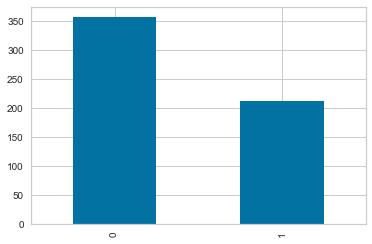

In [10]:
# cek class imbalance
raw_data['diagnosis'].value_counts().plot.bar();

**Train-Test Splitting**

In [11]:
# train-test split
training_data = raw_data.groupby('diagnosis', group_keys=False).apply(lambda x: x.sample(frac = .8, random_state=1000)).copy()

training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
419,0,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.010760,0.1615,...,12.360,28.92,79.26,458.0,0.12820,0.11080,0.03582,0.04306,0.2976,0.07123
459,0,9.755,28.20,61.68,290.9,0.07984,0.04626,0.015410,0.010430,0.1621,...,10.670,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
420,0,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,...,13.070,26.98,86.43,520.5,0.12490,0.19370,0.25600,0.06664,0.3035,0.08284
225,0,14.340,13.47,92.51,641.2,0.09906,0.07624,0.057240,0.046030,0.2075,...,16.770,16.90,110.40,873.2,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072
332,0,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,...,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
241,0,12.420,15.04,78.61,476.5,0.07926,0.03393,0.010530,0.011080,0.1546,...,13.200,20.37,83.85,543.4,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783
157,0,16.840,19.46,108.40,880.2,0.07445,0.07223,0.051500,0.027710,0.1844,...,18.220,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
561,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
398,0,11.060,14.83,70.31,378.2,0.07741,0.04768,0.027120,0.007246,0.1535,...,12.680,20.35,80.79,496.7,0.11200,0.18790,0.20790,0.05556,0.2590,0.09158
192,0,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [12]:
test_data = raw_data.drop(training_data.index)

test_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.1238,0.18660,0.241600,0.18600,0.2750,0.08902
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.1654,0.36820,0.267800,0.15560,0.3196,0.11510
11,1,15.780,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.066060,0.1842,...,20.420,27.28,136.50,1299.0,0.1396,0.56090,0.396500,0.18100,0.3792,0.10480
14,1,13.730,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.080250,0.2069,...,15.030,32.01,108.80,697.7,0.1651,0.77250,0.694300,0.22080,0.3596,0.14310
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.1440,0.17730,0.239000,0.12880,0.2977,0.07259
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.1324,0.11480,0.088670,0.06227,0.2450,0.07773
24,1,16.650,21.38,110.00,904.6,0.11210,0.14570,0.152500,0.091700,0.1995,...,26.460,31.56,177.00,2215.0,0.1805,0.35780,0.469500,0.20950,0.3613,0.09564
29,1,17.570,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,...,20.010,19.52,134.90,1227.0,0.1255,0.28120,0.248900,0.14560,0.2756,0.07919
33,1,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.165700,0.075930,0.1853,...,24.150,30.90,161.40,1813.0,0.1509,0.65900,0.609100,0.17850,0.3672,0.11230
40,1,13.440,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.020310,0.1784,...,15.930,30.25,102.50,787.9,0.1094,0.20430,0.208500,0.11120,0.2994,0.07146


In [13]:
# buat train set
X_train = training_data.iloc[:,1:].values
y_train = training_data['diagnosis'].values

# buat validation/test set
X_test = test_data.iloc[:,1:].values
y_test = test_data['diagnosis'].values

## Bayes Classifier

Bayes Classifier (disebut juga *Naive Bayes Classifier*) adalah salah satu model machine learning yang mana menginsyaratkan tidak adanya keterkaitan antar fitur.

### Dasar Teori

Classifier Bayes dirumuskan berdasarkan Teorema Bayes berikut:

Misalkan terdapat dua kejadian $A$ dan $B$. Kita dapat mengkaitkan masing-masing probabilitas dari dua kejadian ini, $P(A)$ dan $P(B)$, dengan probabilitas kondisional $P(A|B)$ dan $P(B|A)$ berdasarkan aturan berikut:

$$
P(A \cap B) = P(A|B)P(B)
$$

atau

$$
P(B \cap A) = P(B|A)P(A)
$$

Karena

$$P(A \cap B) = P(B \cap A)$$

maka persamaan diatas dapat ditulis kembali sebagai:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

**Mengapa Menggunakan Naive Bayes**

- Cepat
- Hanya membutuhkan sedikit parameter
- Out-of-core learning

**Mengapa Tidak Menggunakan Naive Bayes**

- Base model

## Naive Bayes pada Scikit-Learn

Terdapat 3 implementasi Naive Bayes pada Scikit-Learn, diantaranya:

- Bernoulli Naive Bayes (```BernoulliNB```)
- Multinomial Naive Bayes (```MultinomialNB```)
- Gaussian Naive Bayes (```GaussianNB```)
- Complement Naive Bayes (```ComplementNB```)

### Bernoulli Naive Bayes

Bernoulli Naive Bayes digunakan jika sebaran data mengikuti distribusi Bernoulli.

**Kapan Menggunakan Bernoulli Naive Bayes**

- Ketika tiap fitur dalam matriks bernilai biner 0-1. Misalnya bernilai 0 jika kata tersebut tidak ada di dalam teks, dan 1 jika kata tersebut ada di dalam teks.
- Cocok untuk klasifikasi pesan singkat

### Multinomial Naive Bayes

Multinomial Naive Bayes digunakan untuk data yang sifatnya diskrit.

**Kapan Menggunakan Multinomial Naive Bayes**

- Ketika tiap fitur dalam matriks memiliki nilai diskrit, misalnya dari hasil counting.
- Cocok untuk klasifikasi teks

### Gaussian Naive Bayes

Gaussian Naive Bayes digunakan untuk data dengan fitur numerik.

**Kapan Menggunakan Gaussian Naive Bayes**

- Ketika tiap fitur dalam matriks memiliki nilai numerik

**Syntax GaussianNB**

```python
GaussianNB(priors=None, var_smoothing=1e-09)
```

Keterangan:

- ```priors```: Probabilitas prior dari kelas.
- ```var_smoothing```: Proporsi variansi terbesar dari seluruh variabel yang digunakan untuk modeling 

Keterangan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

### Penerapan Model Gaussian Naive Bayes

In [14]:
# load modul GaussianNB
from sklearn.naive_bayes import GaussianNB

# inisiasi model
model_nb_gaussian = GaussianNB()

# fitting model
model_nb_gaussian.fit(X_train, y_train)

# buat hasil prediksi
hasil_prediksi = model_nb_gaussian.predict(X_test)

# lihat hasil prediksi
hasil_prediksi

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=uint8)

**Model Evaluation**

**Cek Akurasi**

In [15]:
accuracy_score(y_test, hasil_prediksi)

0.9026548672566371

**Catatan** 

*Accuracy (Akurasi)*

Akurasi adalah salah satu metrik yang biasa digunakan dalam menghitung seberapa baik model yang dibuat dalam memprediksi.

$$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

**Confusion Matrix**

In [16]:
confusion_matrix(y_test, hasil_prediksi)

array([[66,  5],
       [ 6, 36]])

**Catatan**

*Confusion Matrix*

Confusion Matrix digunakan untuk melakukan tabulasi silang terhadap hasil antara nilai sebenarnya dengan nilai prediksi.


```python
array([[66,  5],
       [ 6, 36]])
```

Maka:

- True Negative: 66
- False Positive: 5
- False Negative: 6
- True Positive: 36

**Classification Report**

In [17]:
pd.DataFrame(classification_report(y_test, hasil_prediksi, target_names=['0','1'], output_dict=True))

,0,1,micro avg,macro avg,weighted avg
f1-score,0.923077,0.867470,0.902655,0.895273,0.902409
precision,0.916667,0.878049,0.902655,0.897358,0.902313
recall,0.929577,0.857143,0.902655,0.893360,0.902655
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Catatan**

![Precision Recall](./images/meme-1.jpg)

*precision*

precision adalah

$$\frac{True Positive}{True Positive + False Positive}$$

*recall* (atau Sensitivity)

recall adalah

$$\frac{True Positive}{True Positive + False Negative}$$

*f1-score*

f1-score adalah 

$$2\times(\frac{precision \times recall}{precision+recall})$$

Makin besar nilainya makin baik.





In [18]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

In [19]:
confusion_matrix(y_true, y_pred)

array([[2, 1],
       [2, 3]])

**Model Inspection**

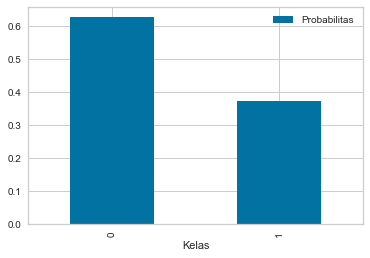

In [20]:
pd.DataFrame({
    "Kelas": [0,1],
    "Probabilitas": model_nb_gaussian.class_prior_
}).plot.bar('Kelas','Probabilitas');

In [21]:
pd.DataFrame({
    "Fitur": training_data.iloc[:,1:].columns,
    "Rerata fitur terhadap kelas Malignant": model_nb_gaussian.theta_[1]
}).sort_values(by='Rerata fitur terhadap kelas Malignant', ascending=False)

,Fitur,Rerata fitur terhadap kelas Malignant
23,area_worst,1391.437647
3,area_mean,970.974118
22,perimeter_worst,140.472412
2,perimeter_mean,115.196529
13,area_se,69.831824
21,texture_worst,29.253706
1,texture_mean,21.520118
20,radius_worst,20.979529
0,radius_mean,17.430647
12,perimeter_se,4.275476


**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

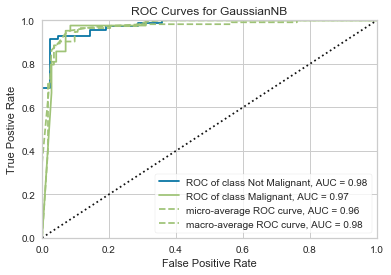

In [22]:
visualizer = ROCAUC(model_nb_gaussian, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

### Catatan Terkait ROC-AUC

ROC adalah suatu plot yang terdiri dari nilai True Positive Rate (Sensitivity) dan False Positive Rate, dimana

$$False Positive Rate = \frac{False Positive}{False Positive + False Negative}$$

Sedangkan AUC adalah luas area dibawah kurva ROC. AUC dapat dipakai untuk mengukur seberapa baik performa dari model. Semakin mendekati 1 semakin baik.


**Precision-Recall Curve**

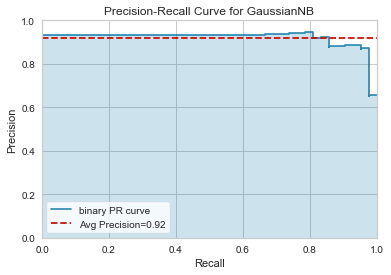

In [23]:
viz = PrecisionRecallCurve(model_nb_gaussian)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

**Catatan**

*Precision-Recall Curve*

*Precision-Recall Curve* adalah kurva yang dibentuk dari nilai precision dan recall. Biasanya dipakai untuk menentukan seberapa baik performa dari model terutama jika terjadinya imbalance class.

*Average Precision* adalah salah satu cara untuk untuk menghitung seberapa baik performa dari model jika kita menggunakan Precision-Recall Curve. Average Precision dirumuskan sebagai berikut:

$$Average Precision = \Sigma_{n}(Recall_{n} - Recall_{n-1}) \times Precision_{n}$$


### Complement Naive Bayes

Complement Naive Bayes mirip dengan multinomial naive Bayes, hanya saja digunakan untuk kasus dimana data memiliki kelas target yang tidak imbang (*imbalance*).

**Kapan Menggunakan Complement Naive Bayes**

- Ketika kelas target tidak seimbang

**Syntax ComplementNB**

```python
ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False)
```

Keterangan: 

- ```alpha```: Penggunaan smoothing parameter. Berfungsi untuk mencegah nilai probabilitas bernilai 0 karena variabel yang dipakai model berbeda dengan data aslinya.
- ```fit_prior```: Hanya digunakan jika terdapat 1 kelas saja pada kelas target.
- ```class_prior```: Probabilitas prior untuk tiap kelas target.

Keterangan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html

### Penerapan Model Naive Bayes

In [24]:
# load modul GaussianNB
from sklearn.naive_bayes import ComplementNB

# inisiasi model
model_nb_complement = ComplementNB(fit_prior=False)

# fitting model
model_nb_complement.fit(X_train, y_train)

# buat hasil prediksi
hasil_prediksi = model_nb_complement.predict(X_test)

# lihat hasil prediksi
hasil_prediksi

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=uint8)

**Evaluasi Hasil Prediksi**

**Cek Akurasi**

In [25]:
accuracy_score(y_test, hasil_prediksi)

0.8849557522123894

**Confusion Matrix**

In [26]:
confusion_matrix(y_test, hasil_prediksi)

array([[67,  4],
       [ 9, 33]])

**Classification Report**

In [27]:
pd.DataFrame(classification_report(y_test, hasil_prediksi, target_names=['0','1'], output_dict=True))

,0,1,micro avg,macro avg,weighted avg
f1-score,0.911565,0.835443,0.884956,0.873504,0.883272
precision,0.881579,0.891892,0.884956,0.886735,0.885412
recall,0.943662,0.785714,0.884956,0.864688,0.884956
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

In [28]:
pd.DataFrame({
    "Variabel": training_data.iloc[:,1:].columns,
    "Weight": model_nb_complement.coef_[0]
}).sort_values(by='Weight', ascending=False)

,Variabel,Weight
19,fractal_dimension_se,12.118734
14,smoothness_se,11.691697
17,concave points_se,11.488138
15,compactness_se,10.879352
18,symmetry_se,10.878500
16,concavity_se,10.717430
7,concave points_mean,10.703871
6,concavity_mean,10.184602
9,fractal_dimension_mean,9.863398
27,concave points_worst,9.707098


In [29]:
pd.DataFrame({
    "Variabel":training_data.iloc[:,1:].columns,
    "Empirical Weight": model_nb_complement.feature_log_prob_[1]
}).sort_values(by='Empirical Weight', ascending=False)

,Variabel,Empirical Weight
19,fractal_dimension_se,12.118734
14,smoothness_se,11.691697
17,concave points_se,11.488138
15,compactness_se,10.879352
18,symmetry_se,10.878500
16,concavity_se,10.717430
7,concave points_mean,10.703871
6,concavity_mean,10.184602
9,fractal_dimension_mean,9.863398
27,concave points_worst,9.707098


**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

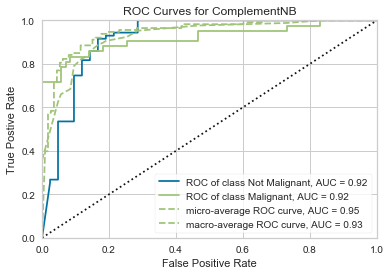

In [30]:
visualizer = ROCAUC(model_nb_complement, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curve**

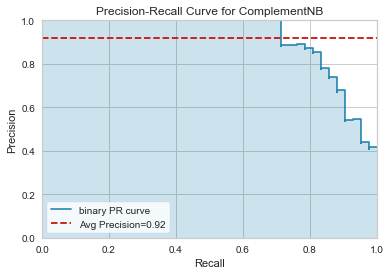

In [31]:
viz = PrecisionRecallCurve(model_nb_complement)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Logistic Regression



![Logistic Regression](./images/logistic_regression.png)

Sumber Gambar: https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7

### Dasar Teori

Logistic Regression adalah salah satu model parametrik yang menggunakan fungsi logistik untuk melakukan fitting pada data:

$$f(\bar{x},\bar{w}) = \frac{1}{1+e^{-\bar{x}\bar{w}}}$$


**Kapan Menggunakan Logistic Regression**

- Jika data yang dipakai untuk pemodelan tidak terlalu besar
- Sebagai base model

**Syntax LogisticRegression**

```python
LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```

Keterangan:

- ```penalty```: Pemilihan fungsi norm yang digunakan untuk *penalization*. Pilihannya adalah ```l1```, ```l2```, ```elasticnet``` dan ```none```
- ```dual```: Formulasi "dual" atau "primal".
- ```tol```: Nilai toleransi error
- ```C```: Berfungsi untuk *regularization* untuk menghindari kasus *overfitting*
- ```fit_intercept```: Apakah menggunakan *intercept* atau tidak.
- ```class_weight```: Memberikan pembobotan pada kelas target.
- ```random_state```: Berfungsi untuk melakukan seeding pada RNG.
- ```solver```: Algoritma yang digunakan untuk fitting model.
    - Gunakan ‘liblinear’ untuk dataset kecil, gunakan ‘sag’ dan ‘saga’ untuk data ukuran besar.
    - Untuk kasus multiclass, gunakan ‘newton-cg’, ‘sag’, ‘saga’ dan ‘lbfgs’ untuk multinomial.
    - ‘newton-cg’, ‘lbfgs’, ‘sag’ dan ‘saga’ dapat melakukan regularisasi L2 atau tanpa penalti
    - ‘liblinear’ dan ‘saga’ dapat melakukan regularisasi menggunakan L1
    - ‘saga’ dapat menggunakan regularisasi menggunakan ‘elasticnet’
    - ‘liblinear’ harus menggunakan penalti
- ```max_iter```: Iterasi maksimal
- ```multi_class```: Apakah kasusnya binary atau multiclass.
    - Gunakan ‘ovr’ untuk kasus binary
    - Gunakan ‘multinomial’ untuk kasus multiclass
    - Gunakan 'auto' untuk memilih secara otomatis tergantung dari kelas targetnya
- ```n_jobs```: Jumlah core CPU yang digunakan untuk pemodelan

Sisanya dapat dibaca di: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Penerapan Model Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

model_logistic_reg = LogisticRegression(random_state=1000, solver='liblinear', multi_class='ovr')

In [33]:
# fitting model
model_logistic_reg.fit(X_train, y_train)

# buat hasil prediksi
hasil_prediksi = model_logistic_reg.predict(X_test)

# lihat hasil prediksi
hasil_prediksi

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=uint8)

**Evaluasi Model**

**Akurasi**

In [34]:
accuracy_score(y_test, hasil_prediksi)

0.9380530973451328

**Confusion Matrix**

In [35]:
confusion_matrix(y_test, hasil_prediksi)

array([[68,  3],
       [ 4, 38]])

**Classification Report**

In [36]:
pd.DataFrame(classification_report(y_test, hasil_prediksi, output_dict=True))

,0,1,micro avg,macro avg,weighted avg
f1-score,0.951049,0.915663,0.938053,0.933356,0.937897
precision,0.944444,0.926829,0.938053,0.935637,0.937897
recall,0.957746,0.904762,0.938053,0.931254,0.938053
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

**Coefficients Weight**

In [37]:
nama_feature = training_data.iloc[:,1:].columns.tolist()

In [38]:
eli5.explain_weights(model_logistic_reg, feature_names=nama_feature)

Weight?,Feature
+1.343,concavity_worst
+1.038,compactness_worst
+0.557,symmetry_worst
+0.505,concavity_mean
+0.478,concave points_worst
+0.370,compactness_mean
+0.307,perimeter_worst
+0.289,texture_worst
+0.246,concave points_mean
+0.208,smoothness_worst


**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

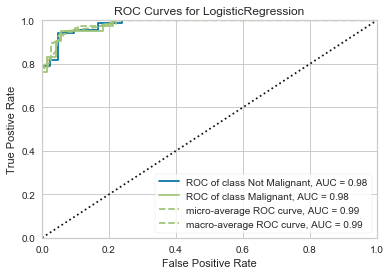

In [39]:
visualizer = ROCAUC(model_logistic_reg, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curves**

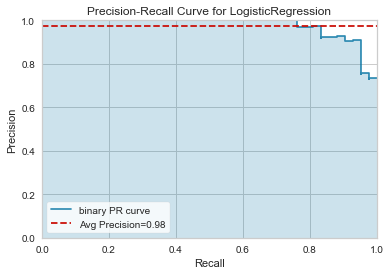

In [40]:
viz = PrecisionRecallCurve(model_logistic_reg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## K-Nearest Neighbors

![KNN](./images/knn_.png)

Sumber Gambar: https://www.kdnuggets.com/2019/07/classifying-heart-disease-using-k-nearest-neighbors.html

### Dasar Teori

K-Nearest Neighbors (KNN) adalah salah satu model machine learning non-parametrik dimana model menggunakan posisi dari tiap titik data pada saat training untuk mengklasifikasikan data yang baru.

Karena posisi titik sangat diperhitungkan, maka KNN bergantung kepada fungsi jarak yang digunakan dalam pemodelan, diantaranya:

**Jarak Manhatan (*Manhatan Distance*)**

$$d(x,y) = \Sigma_{i=1}^{k} |x_{i} - y_{i}|$$

**Jarak Euclidean (*Euclidean Distance*)**

$$d(x,y) = \sqrt{\Sigma_{i=1}^{k} (x_{i} - y_{i})^{2}}$$

**Jarak Minkowski (*Minkowski Distance*)**

$$d(x,y) = (\Sigma_{i=1}^{k} (x_{i} - y_{i})^{p})^{p}$$

**Kapan Menggunakan K-Nearest Neighbors**

- Base model

**Syntax KNeighborsClassifier**

```python
KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, p=2, metric=’minkowski’, n_jobs=None)
```

Keterangan: 

- ```n_neigbors```: Jumlah titik yang digunakan untuk menentukan kelas dari data yang baru.
- ```weights```: Pembobotan yang dipakai untuk melakukan prediksi. Terdapat 2 pilihan, yaitu:
    - ```uniform```: Setiap titik diperlakukan sama
    - ```distance```: Setiap titik diberi bobot berdasarkan inverse jarak.
- ```algorithm```: Algoritma yang dipakai untuk menghitung nilai ketetanggaan antar titik. Terdapat 4 pilihan:
    - ```balll_tree```
    - ```kd_tree```
    - ```brute```
    - ```auto```
- ```p```: Derajat atau pangkat yang digunakan untuk menghitung jarak antar titik berdasarkan rumus jarak Minkowski. 
    - Jika ```p=1```, maka jarak yang digunakan jarak Manhatan
    - Jika ```p=2```, maka jarak yang digunakan jarak Euclidean
- ```metric```: Fungsi jarak yang dipakai untuk menghitung jarak antar titik
- ```n_jobs```: Berapa banyak CPU yang digunakan untuk membuat model.

**Penerapan Model K-Nearest Neighbors**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto')

model_knn.fit(X_train, y_train)

hasil_prediksi = model_knn.predict(X_test)

hasil_prediksi

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=uint8)

**Evaluasi**

In [42]:
accuracy_score(y_test, hasil_prediksi)

0.9380530973451328

In [43]:
confusion_matrix(y_test, hasil_prediksi)

array([[68,  3],
       [ 4, 38]])

In [44]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

,0,1,micro avg,macro avg,weighted avg
f1-score,0.951049,0.915663,0.938053,0.933356,0.937897
precision,0.944444,0.926829,0.938053,0.935637,0.937897
recall,0.957746,0.904762,0.938053,0.931254,0.938053
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

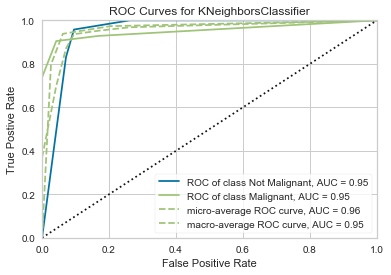

In [45]:
visualizer = ROCAUC(model_knn, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precission-Recall Curve**

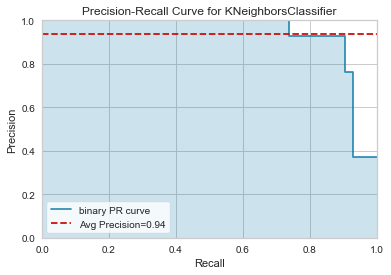

In [46]:
viz = PrecisionRecallCurve(model_knn)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Decision Tree

![Decision Tree](./images/decision_tree.png)

Sumber Gambar: https://www.displayr.com/what-is-a-decision-tree/

### Dasar Teori

Decision Tree adalah salah satu model machine learning non parametrik yang didasarkan pada pembentukan pohon keputusan. Model ini dibangun dengan cara menentukan root node, lalu membentuk cabang-cabang keputusan yang dibuat berdasarkan ukuran tertentu yang disebut sebagai *split criteria* atau *impurity measures*. Hasil yang diperoleh dari decision tree bisa berupa aturan-aturan yang dapat diinterpretasikan ke dalam bahasa manusia sehingga model decision tree lebih mudah dipahami oleh orang awam sekalipun.

**Beberapa *Split Criteria/Impurity Measures***

![Impurity Measures](./images/impurity.png)


**Kapan Menggunakan Decision Tree**

- Ketika membutuhkan model yang memiliki performa lebih baik dibanding base model dan mudah diinterpretasikan
- Ketika masalah yang ingin diselesaikan adalah masalah bisnis dimana membutuhkan panduan dalam membuat keputusan

**Syntax DecisionTreeClassifier**

```python
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
```

Keterangan:

- ```criterion```: ukuran yang dipakai untuk melakukan split pada node, terdapat dua pilihan yaitu 'gini' untuk penggunaan gini index dan 'entropy' untuk penggunaan information gain.
- ```splitter```: strategi yang digunakan untuk split pada tiap node, terdapat dua pilihan yaitu 'best' dan 'random'.

In [47]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=1000)

model_decision_tree.fit(X_train, y_train)

hasil_prediksi = model_decision_tree.predict(X_test)

hasil_prediksi

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=uint8)

**Model Evaluation**

In [48]:
accuracy_score(y_test, hasil_prediksi)

0.9292035398230089

In [49]:
confusion_matrix(y_test, hasil_prediksi)

array([[68,  3],
       [ 5, 37]])

In [50]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

,0,1,micro avg,macro avg,weighted avg
f1-score,0.944444,0.902439,0.929204,0.923442,0.928832
precision,0.931507,0.925000,0.929204,0.928253,0.929088
recall,0.957746,0.880952,0.929204,0.919349,0.929204
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

**Feature Importance & Rules**

In [51]:
eli5.sklearn.explain_decision_tree(model_decision_tree, feature_names=training_data.iloc[:,1:].columns.tolist())

Weight,Feature
0.7059,perimeter_worst
0.1078,concave points_worst
0.0458,texture_worst
0.0287,texture_mean
0.0248,concavity_mean
0.0210,area_se
0.0181,fractal_dimension_se
0.0141,texture_se
0.0093,concave points_mean
0.0088,compactness_mean


**Tree Visualization**

In [52]:
import graphviz
dot_data = tree.export_graphviz(model_decision_tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

NameError: name 'tree' is not defined

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

In [ ]:
visualizer = ROCAUC(model_decision_tree, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precission-Recall Curve**

In [ ]:
viz = PrecisionRecallCurve(model_decision_tree)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## AdaBoost

![AdaBoost](./images/adaboost.png)

Sumber Gambar: https://medium.com/swlh/boosting-and-bagging-explained-with-examples-5353a36eb78d


**Kapan Menggunakan AdaBoost**

- Ketika akurasi lebih diutamakan dibanding interpretabilitas.
- Mencari tahu mana variabel yang lebih penting dibanding variabel lainnya menggunakan feature importance.

**Syntax AdaBoostClassifier**

```python
AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
```

Keterangan:

- ```base_estimator```: Estimator yang digunakan untuk membuat model.
- ```n_estimators```: Banyak estimator yang dibuat.
- ```learning_rate```: Berfungsi untuk memperkecil kontribusi tiap estimator yang dibuat.
- ```algorithm```: Algoritma yang digunakan untuk. Terdapat dua pilihan, yaitu 'SAMME' dan 'SAMME.R'
- ```random_state```: Berfungsi untuk seeding random number generator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(random_state=1000)

model_adaboost.fit(X_train, y_train)

hasil_prediksi = model_adaboost.predict(X_test)

hasil_prediksi

**Model Evaluation**

In [ ]:
accuracy_score(y_test, hasil_prediksi)

In [ ]:
confusion_matrix(y_test, hasil_prediksi)

In [ ]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

**Model Inspection**

**Feature Importance**

In [ ]:
eli5.explain_weights(model_adaboost, feature_names=training_data.iloc[:,1:].columns.tolist())

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

In [ ]:
visualizer = ROCAUC(model_adaboost, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curve**

In [ ]:
viz = PrecisionRecallCurve(model_adaboost)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Random Forest

![Random Forest](./images/random_forest.png)

Sumber gambar: https://www.machinehack.com/course/machinehack-practise-5-random-forest-regression/

**Kapan Menggunakan Random Forest**

**Syntax RandomForest**

```python
RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
```

Keterangan:

- ```n_estimators```: Jumlah pohon yang dibuat.
- ```criterion```: Kriteria yang digunakan untuk melakukan split pada node. Terdapat dua pilihan, diantaranya 'gini' untuk penggunaan gini index dan 'entropy' untuk penggunaan information gain.
- ```max_depth```: Seberapa banyak node yang akan dibentuk. Semakin besar maka semakin dalam pohon yang dibuat.
- ```min_sample_split```: Jumlah sampel minimum yang digunakan node untuk split.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_randomforest = RandomForestClassifier(n_estimators=100, random_state=1000, max_depth=4)

model_randomforest.fit(X_train, y_train)

hasil_prediksi = model_randomforest.predict(X_test)

hasil_prediksi

**Model Evaluation**

In [ ]:
accuracy_score(y_test, hasil_prediksi)

In [ ]:
confusion_matrix(y_test, hasil_prediksi)

In [ ]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

**Model Inspection**

**Feature Importance**

In [ ]:
eli5.sklearn.explain_rf_feature_importance(model_randomforest ,top=100, feature_names=training_data.iloc[:,1:].columns.tolist())

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

In [ ]:
visualizer = ROCAUC(model_randomforest, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curve**

In [ ]:
viz = PrecisionRecallCurve(model_randomforest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Gradient Boosting Tree

![Gradient Boosting Tree](./images/gradient_boosting_tree.png)

Sumber gambar: https://bradleyboehmke.github.io/HOML/gbm.html

**Kapan Menggunakan Gradient Boosting Tree**

**Syntax GradientBoostingClassifier**

```python
GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
```

In [55]:
#yang diprediksi errornya
#bedanya dengan random, gradient boosting hanya mengambil semua sample data
#

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1000)

model_gradient_boosting.fit(X_train, y_train)

hasil_prediksi = model_gradient_boosting.predict(X_test)

hasil_prediksi

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=uint8)

**Model Evaluation**

In [57]:
accuracy_score(y_test, hasil_prediksi)

0.9557522123893806

In [58]:
confusion_matrix(y_test, hasil_prediksi)

array([[70,  1],
       [ 4, 38]])

In [59]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

,0,1,micro avg,macro avg,weighted avg
f1-score,0.965517,0.938272,0.955752,0.951894,0.955391
precision,0.945946,0.974359,0.955752,0.960152,0.956507
recall,0.985915,0.904762,0.955752,0.945339,0.955752
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

In [60]:
eli5.explain_weights(model_gradient_boosting, feature_names=training_data.iloc[:,1:].columns.tolist())

Weight,Feature
0.8081 ± 0.3412,perimeter_worst
0.1080 ± 0.2800,concave points_mean
0.0252 ± 0.6000,texture_worst
0.0164 ± 0.6726,smoothness_worst
0.0112 ± 0.6940,symmetry_worst
0.0094 ± 0.2800,concave points_worst
0.0072 ± 0.5426,area_se
0.0054 ± 0.4750,texture_se
0.0040 ± 0.3919,concavity_worst
0.0017 ± 0.4359,smoothness_se


Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)

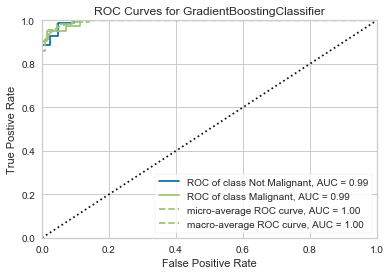

In [61]:
visualizer = ROCAUC(model_gradient_boosting, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curve**

In [62]:
viz = PrecisionRecallCurve(model_randomforest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

NameError: name 'model_randomforest' is not defined

## Support Vector Machine

![SVM](./images/svm.png)

Sumber gambar: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

**Kapan Menggunakan SVM**

**Syntax SVC**

```python
SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
```



In [53]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', gamma = 'scale', random_state=1000, probability=True)

model_svm.fit(X_train, y_train)

hasil_prediksi = model_svm.predict(X_test)

hasil_prediksi

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=uint8)

**Model Evaluation**

In [54]:
accuracy_score(y_test, hasil_prediksi)

0.9469026548672567

In [63]:
confusion_matrix(y_test, hasil_prediksi)

array([[70,  1],
       [ 4, 38]])

In [64]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

,0,1,micro avg,macro avg,weighted avg
f1-score,0.965517,0.938272,0.955752,0.951894,0.955391
precision,0.945946,0.974359,0.955752,0.960152,0.956507
recall,0.985915,0.904762,0.955752,0.945339,0.955752
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

In [70]:
eli5.explain_weights(model_svm, feature_names=nama_feature)

Weight?,Feature
+1.242,concavity_worst
+0.755,symmetry_worst
+0.707,compactness_worst
+0.514,concave points_worst
+0.413,concavity_mean
+0.385,smoothness_worst
+0.289,symmetry_mean
+0.272,compactness_mean
+0.253,concave points_mean
+0.248,texture_worst


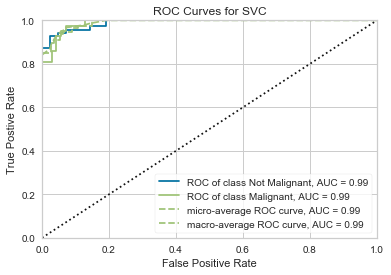

In [68]:
visualizer = ROCAUC(model_svm, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

In [71]:
viz = PrecisionRecallCurve(model_randomforest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

NameError: name 'model_randomforest' is not defined